# Exercise: Classify Flowers with a Decision Tree

In this exercise, we'll classify three different iris flower types using a decision tree classifier. 

Your tasks are the following:

- Identify the data types of `X` and `y`
- Get an overview of the dataset
- Plot a histogram of the data
- Split into training and test data
- Examine the shape of your training data
- Train a decision tree
- Make predictions with your model
- Calculate the accuracy

## 1. Data Analysis

In [2]:
# import packages
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
# store features and labels in X and y
X = iris.data
y = iris.target

In [5]:
# print description of dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**TODO**: Which data types are X and y, respectively?

In [6]:
print("Type of X:", type(X))
print("Type of y:", type(y))

# Peek inside
print("\nX sample (first 5 rows):")
print(X[:5])

print("\ny sample (first 5 labels):")
print(y[:5])

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>

X sample (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

y sample (first 5 labels):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


**YOUR ANSWER**:X is a DataFrame (or ndarray) containing numeric values (float)
	•	y is a Series (or ndarray) containing integer labels (0, 1, 2)
	•	Both X and y are numeric, not categorical, and there are no missing values

**TODO**: Get an overview of the dataset and answer the following questions:
- How many features are in the dataset?
- How many samples are in the dataset?
- Which labels do exist?
- Are there empty data entries that we have to take care of?
- Are there categorical or numerical attributes?

In [7]:
# How many features (columns) and samples (rows)?
print("Shape of X:", X.shape)

# What are the unique labels?
print("Unique labels in y:", y.unique())

# Are there any missing values?
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Data types for each feature
print("\nData types of X:\n", X.dtypes)

Shape of X: (150, 4)
Unique labels in y: [0 1 2]
Missing values in X: 0
Missing values in y: 0

Data types of X:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


**YOUR ANSWER**:	•	The dataset has 150 samples (rows) and 4 features (columns).
	•	The labels in y are 0, 1, and 2, which represent the 3 types of iris flowers.
	•	There are no missing values in either X or y.
	•	All features in X are numerical (float64), and y contains integer labels.

**TODO**: Plot a histogram of the data. Can you guess which features might be more important than others?

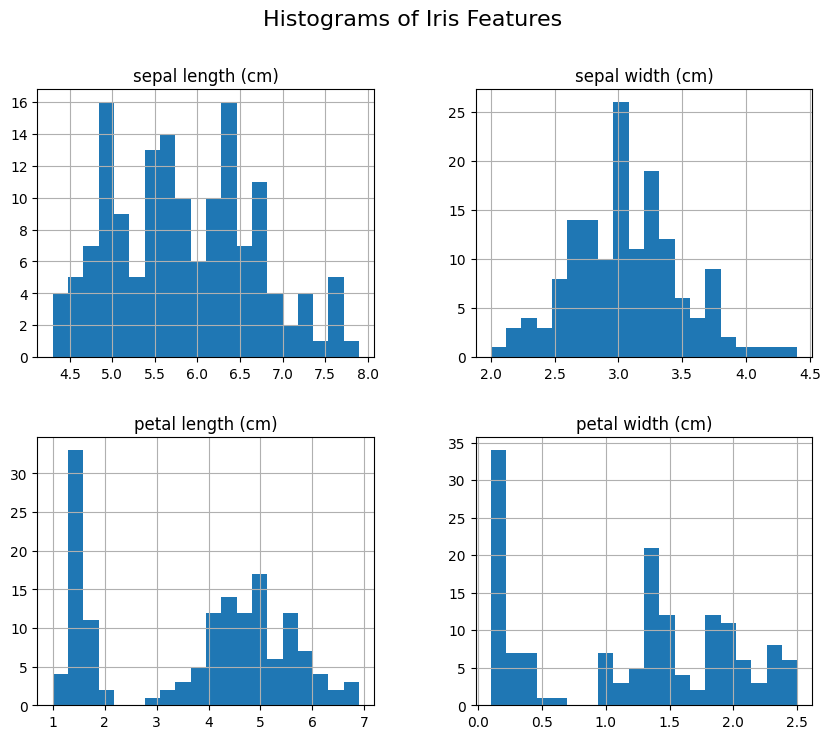

In [8]:
import matplotlib.pyplot as plt

X.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Iris Features", fontsize=16)
plt.show()

**YOUR ANSWER**:The histograms show that 'petal length' and 'petal width' have clear groupings, making them useful for distinguishing flower types. 'Sepal length' and 'sepal width' are more normally distributed with overlapping values, so they may be less helpful for classification.

# 2. Training and Evaluation

In [9]:
# we only use 2 features for training
X = iris.data[["petal length (cm)", "petal width (cm)"]]

**TODO**: Split `X` and `y` in training and test data. Save the result in variables called `X_train`, `X_test`, `y_train`, `y_test`. 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**TODO**: How many samples are contained in `X_test`? Which data format do we have here?

In [11]:
print("Test set size:", len(X_test))
print("Type of X_test:", type(X_test))

Test set size: 30
Type of X_test: <class 'pandas.core.frame.DataFrame'>


**YOUR ANSWER**:test_size=0.2 on a 150-row dataset.
	•	Type of X_test: <class 'pandas.core.frame.DataFrame'> → This confirms that X_test is a pandas DataFrame, which makes it easy to work with for further analysis and model evaluation.

**TODO**: Fit a `DecisionTreeClassifier` with `max_depth=3` and `random_state` set to a value of your choice on the training data!

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**TODO**: Calculate the predictions on training and test data and save the result in `y_pred_train` and `y_pred_test`, respectively.

In [13]:
# Predict on training data
y_pred_train = model.predict(X_train)

# Predict on test data
y_pred_test = model.predict(X_test)

**TODO**: Evaluate your model by calculating the accuracy on training and test data, i.e. the number of correctly classified samples normalized over all samples:

$
\text{Accuracy} = \frac{\text{\# correctly classified samples}}{\text{\# samples}}
$

In [14]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9583333333333334
Test Accuracy: 1.0
